In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df_cat = pd.read_csv("results/cat_train.csv")
df_dog = pd.read_csv("results/dog_train.csv")
df_bird = pd.read_csv("results/bird_train.csv")

# cat

In [48]:
"number of cat images: {}".format(df_cat.shape[0])

'number of cat images: 1000'

In [49]:
"estimation speed: 12.6s/image"

'estimation speed: 12.6s/image'

In [50]:
absolute_errs = abs(df_cat["GT"] - df_cat["Response"])
relative_errs_cat = absolute_errs / df_cat["GT"]

In [51]:
print("absolute errors -> mean: {:.2f}, median: {:.2f}, std: {:.2f}, max: {:.2f}".format(absolute_errs.mean(), absolute_errs.median(), absolute_errs.std(), absolute_errs.max()))
print("relative errors -> mean: {:.3f}, median: {:.3f} std: {:.3f}, max: {:.3f}".format(relative_errs_cat.mean(), relative_errs_cat.median(), relative_errs_cat.std(), relative_errs_cat.max()))

absolute errors -> mean: 2.97, median: 2.00, std: 3.67, max: 36.10
relative errors -> mean: 0.123, median: 0.074 std: 0.165, max: 2.333


In [52]:
# plt.hist(absolute_errs, 100)
# plt.xticks(np.arange(0, 40, step=2), rotation=45)
# plt.title("histgram of absolute errors")
# plt.xlabel("absolute error")
# plt.show()

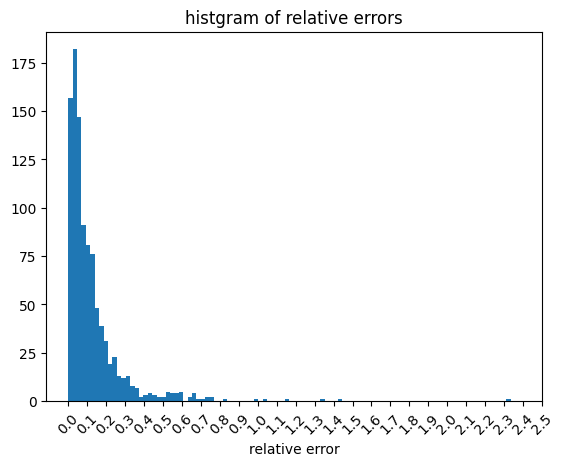

In [53]:
plt.hist(relative_errs_cat, 100)
plt.xticks(np.arange(0, 2.6, step=0.1), rotation=45)
plt.title("histgram of relative errors")
plt.xlabel("relative error")
plt.show()

In [54]:
# (relative_errs < 0.2).sum(), (relative_errs < 0.1).sum()

# dog

In [55]:
"number of dog images: {}".format(df_dog.shape[0])

'number of dog images: 1177'

In [56]:
"estimation speed: {} s/image".format(round(df_dog["Time"].sum() / df_dog.shape[0], 2))

'estimation speed: 9.07 s/image'

In [57]:
absolute_errs = abs(df_dog["GT"] - df_dog["Response"])
relative_errs_dog = absolute_errs / df_dog["GT"]

In [58]:
print("absolute errors -> mean: {:.2f}, median: {:.2f}, std: {:.2f}, max: {:.2f}".format(absolute_errs.mean(), absolute_errs.median(), absolute_errs.std(), absolute_errs.max()))
print("relative errors -> mean: {:.3f}, median: {:.3f} std: {:.3f}, max: {:.3f}".format(relative_errs_dog.mean(), relative_errs_dog.median(), relative_errs_dog.std(), relative_errs_dog.max()))

absolute errors -> mean: 3.31, median: 2.22, std: 3.61, max: 24.83
relative errors -> mean: 0.166, median: 0.120 std: 0.168, max: 1.632


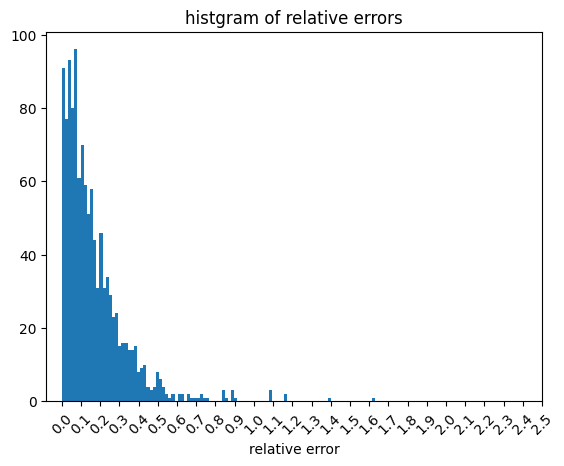

In [59]:
plt.hist(relative_errs_dog, 100)
plt.xticks(np.arange(0, 2.6, step=0.1), rotation=45)
plt.title("histgram of relative errors")
plt.xlabel("relative error")
plt.show()

# bird

In [60]:
"number of bird images: {}".format(df_bird.shape[0])

'number of bird images: 698'

In [61]:
"estimation speed: {} s/image".format(round(df_bird["Time"].sum() / df_bird.shape[0], 2))

'estimation speed: 15.19 s/image'

In [62]:
absolute_errs = abs(df_bird["GT"] - df_bird["Response"])
relative_errs_bird = absolute_errs / df_bird["GT"]

In [63]:
print("absolute errors -> mean: {:.2f}, median: {:.2f}, std: {:.2f}, max: {:.2f}".format(absolute_errs.mean(), absolute_errs.median(), absolute_errs.std(), absolute_errs.max()))
print("relative errors -> mean: {:.3f}, median: {:.3f} std: {:.3f}, max: {:.3f}".format(relative_errs_bird.mean(), relative_errs_bird.median(), relative_errs_bird.std(), relative_errs_bird.max()))

absolute errors -> mean: 1.63, median: 0.81, std: 2.54, max: 36.81
relative errors -> mean: 0.201, median: 0.121 std: 0.275, max: 2.571


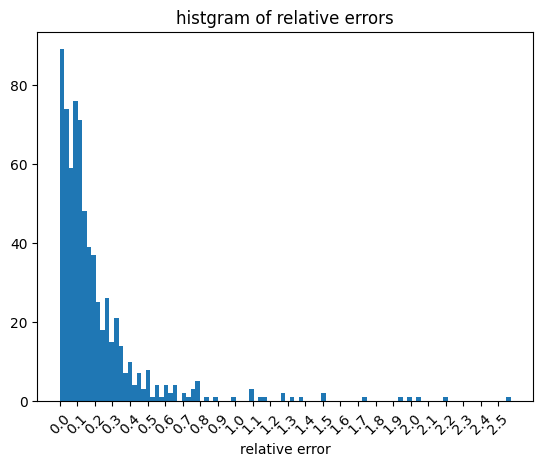

In [64]:
plt.hist(relative_errs_bird, 100)
plt.xticks(np.arange(0, 2.6, step=0.1), rotation=45)
plt.title("histgram of relative errors")
plt.xlabel("relative error")
plt.show()

In [100]:
cat_count, cat_bin = np.histogram(relative_errs_cat, 200)
dog_count, dog_bin = np.histogram(relative_errs_dog, 200)
bird_count, bird_bin = np.histogram(relative_errs_bird, 200)

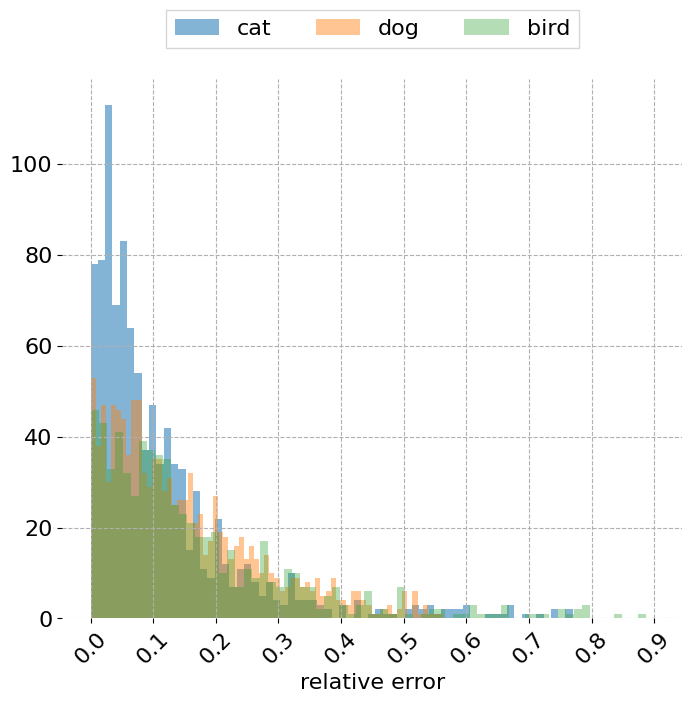

In [119]:
fig = plt.figure(1, (8, 7))
ax = plt.subplot()
ax.stairs(cat_count[:70], cat_bin[:71], label="cat", alpha=0.55, fill=True)
ax.stairs(dog_count[:70], dog_bin[:71], label="dog", alpha=0.45, fill=True)
ax.stairs(bird_count[:70], bird_bin[:71], label="bird", alpha=0.35, fill=True)
ax.legend()
ax.set_xticks(list(np.arange(0, 1, step=0.1)), [round(num, 1) for num in np.arange(0, 1, step=0.1)], rotation=45)
ax.set_xlabel("relative error", fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True, which='major', linestyle='--')
ax.xaxis.grid(True, which='major', linestyle='--')
ax.legend(prop={'size': 16}, loc='upper center', bbox_to_anchor=(0.5, 1.15),
          fancybox=False, shadow=False, ncol=3)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("relative_error_histogram.png", format="png")
plt.show()
